<a href="https://colab.research.google.com/github/shahtvisha/ImageProcessing/blob/main/ImageSegmentationComparativeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

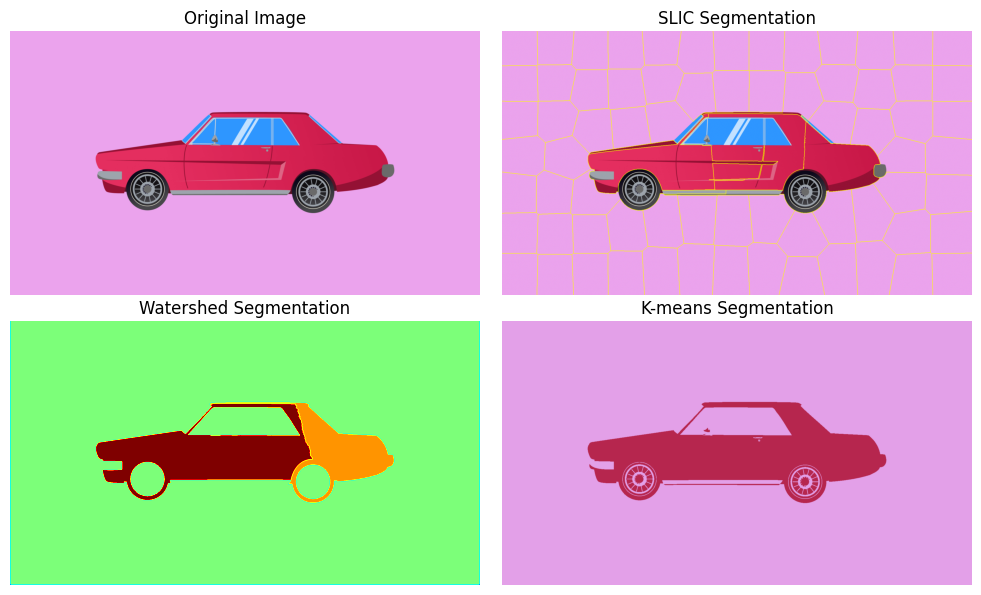

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
image = cv2.imread('/content/car1.png')

# GrabCut segmentation
def slic_segmentation(image):
    segments = slic(image, n_segments=100, compactness=10)
    return segments

# Watershed segmentation
def watershed_segmentation(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    sure_bg = cv2.dilate(opening, kernel, iterations=3)
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    markers = cv2.watershed(image, markers)
    return markers

# K-means clustering segmentation
def kmeans_segmentation(image):
    reshaped_image = image.reshape((-1, 3))
    reshaped_image = np.float32(reshaped_image)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _, labels, center = cv2.kmeans(reshaped_image, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    segmented_image = center[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    return segmented_image

# Perform segmentations
slic_segments = slic_segmentation(image)
watershed_markers = watershed_segmentation(image)
kmeans_segmented_image = kmeans_segmentation(image)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mark_boundaries(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), slic_segments))
plt.title('SLIC Segmentation')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(watershed_markers, cmap='jet')
plt.title('Watershed Segmentation')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(kmeans_segmented_image, cv2.COLOR_BGR2RGB))
plt.title('K-means Segmentation')
plt.axis('off')

plt.tight_layout()
plt.show()
